In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:

path=r'C:\Users\reddy\Naresh IT\Data Science\python classes\visadataset.csv'
visa_df=pd.read_csv(path)
visa_df.head(3)

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied


**steps in outlier analysis**
 
- step-1 : find Q1 , Q2 and Q3
    
    - np.percentile(column data ,q)
- step-2: calculate the IQR
    
    - IQR=Q3-Q1
    
- step-3: calculate the lower boundary and upper boundary
    
    -lb: Q1-1.5IQR
    -ub: Q3+1.5IQR
        
- step-4: find the outlierdf
    - c1: column data < lb
    - c2: column data > ub
    - c: apply the main condition 
    - main data(c)

In [6]:
Q1=np.percentile(visa_df['prevailing_wage'],25)
Q2=np.percentile(visa_df['prevailing_wage'],50)
Q3=np.percentile(visa_df['prevailing_wage'],75)
IQR=Q3-Q1
lb=Q1-1.5*IQR
ub=Q3+1.5*IQR

c1=visa_df['prevailing_wage']<lb
c2=visa_df['prevailing_wage']>ub
con=c1|c2
outliers_df=visa_df[con]
outliers_df

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
14,EZYV15,Asia,Master's,Y,Y,15756,2006,South,220081.73,Year,Y,Certified
34,EZYV35,Asia,Master's,N,N,1809,2010,South,225569.73,Year,N,Certified
130,EZYV131,South America,High School,N,N,2554,2005,Midwest,247393.01,Year,Y,Certified
216,EZYV217,Asia,Master's,Y,N,1515,2001,Midwest,269321.68,Year,N,Certified
221,EZYV222,North America,Doctorate,Y,Y,2518,2010,South,219529.62,Year,Y,Certified
...,...,...,...,...,...,...,...,...,...,...,...,...
25191,EZYV25192,Asia,Master's,N,N,4983,2005,Midwest,280482.51,Year,Y,Denied
25195,EZYV25196,North America,Master's,Y,N,47,2001,South,234308.77,Year,N,Certified
25468,EZYV25469,Asia,Bachelor's,N,N,373,2005,Midwest,272715.74,Year,N,Certified
25469,EZYV25470,North America,Master's,Y,N,2261,1997,Northeast,273772.47,Year,N,Certified


In [13]:
Q1=np.percentile(visa_df['prevailing_wage'],25)
Q2=np.percentile(visa_df['prevailing_wage'],50)
Q3=np.percentile(visa_df['prevailing_wage'],75)
IQR=Q3-Q1
lb=Q1-1.5*IQR
ub=Q3+1.5*IQR

c1=visa_df['prevailing_wage']>lb
c2=visa_df['prevailing_wage']<ub
con=c1&c2
non_outliers_df=visa_df[con]
non_outliers_df

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified
...,...,...,...,...,...,...,...,...,...,...,...,...
25474,EZYV25475,Africa,Doctorate,N,N,2594,1979,Northeast,51104.7800,Year,Y,Certified
25475,EZYV25476,Asia,Bachelor's,Y,Y,2601,2008,South,77092.5700,Year,Y,Certified
25477,EZYV25478,Asia,Master's,Y,N,1121,1910,South,146298.8500,Year,N,Certified
25478,EZYV25479,Asia,Master's,Y,Y,1918,1887,West,86154.7700,Year,Y,Certified


 Compare originl data with non outliers data :

will plot histogram and boxplot of the both

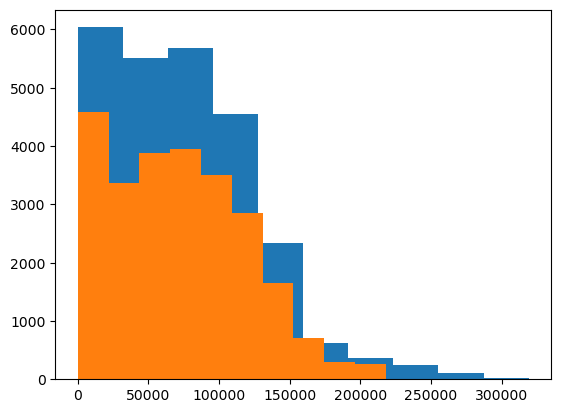

In [20]:
plt.hist(visa_df['prevailing_wage'])
plt.hist(non_outliers_df['prevailing_wage'])
plt.show()


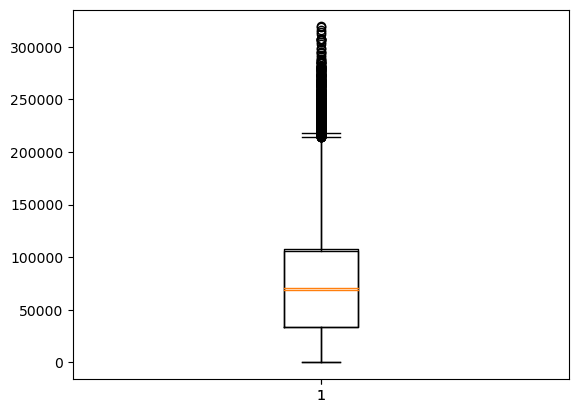

In [19]:
plt.boxplot(visa_df['prevailing_wage'])
plt.boxplot(non_outliers_df['prevailing_wage'])
plt.show()


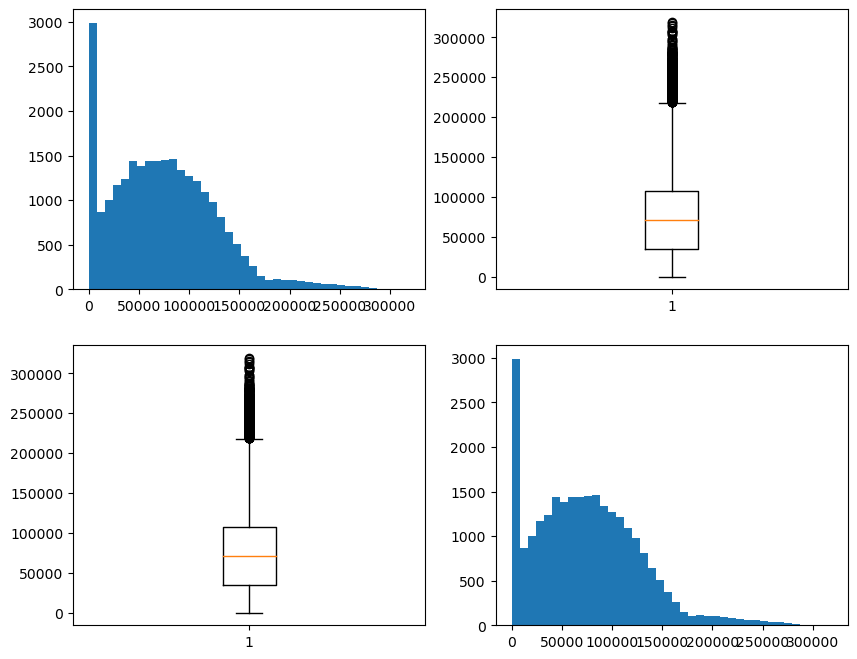

In [30]:
plt.figure(figsize=(10,8))
plt.subplot(2,2,1)
plt.hist(visa_df['prevailing_wage'],bins=40)
plt.subplot(2,2,2)
plt.boxplot(visa_df['prevailing_wage'])
plt.subplot(2,2,3)
plt.boxplot(visa_df['prevailing_wage'])
plt.subplot(2,2,4)
plt.hist(visa_df['prevailing_wage'],bins=40)
plt.show()

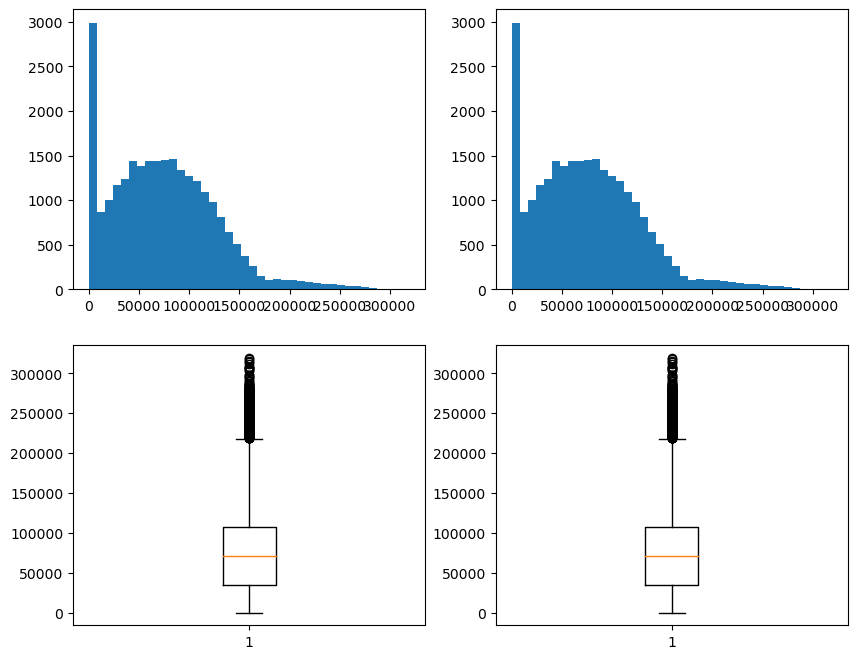

In [33]:
plt.figure(figsize=(10,8))
plt.subplot(2,2,1).hist(visa_df['prevailing_wage'],bins=40)
plt.subplot(2,2,2).hist(visa_df['prevailing_wage'],bins=40)
plt.subplot(2,2,3).boxplot(visa_df['prevailing_wage'])
plt.subplot(2,2,4).boxplot(visa_df['prevailing_wage'])
plt.show()

$HOW$  $TO$  $DEAL$  $THE$  $OUTLIERS$

***Drop the outliers***
   - we can drop the outlier if its percentage  <2%
    
   - But this is not recommended, we lost other columns data also
 
***Input the Median values***

   - As we know that median doesnot affect by outliers
    
   - so it is good practice we can inpute outliers with medaian values

***Cap with Q3 or Q1 value***
    
   - if outliers are present less than lower bound then fill with Q1
    
   - if outliers are more than upper bound than fill with Q3
    

In [34]:
# TASK-03
# Read the each observation from prevailing wage
#if the observations <lb or <ub : fill with median values
# else : keep as it is

In [41]:
median_list=[]
median=visa_df['prevailing_wage'].median()
for i in visa_df['prevailing_wage']:
    if i<lb or i>ub:
        median_list.append(median)
    else:
        median_list.append(i)
        
len(median_list)

25480

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [42]:
path=r'C:\Users\reddy\Naresh IT\Data Science\python classes\visadataset.csv'
visa_df=pd.read_csv(path)
visa_df.head(3)

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied


In [45]:
Q1=np.percentile(visa_df['prevailing_wage'],25)
Q2=np.percentile(visa_df['prevailing_wage'],50)
Q3=np.percentile(visa_df['prevailing_wage'],75)
IQR=Q3-Q1
lb=Q1-1.5*IQR
ub=Q3+1.5*IQR

median=visa_df['prevailing_wage'].median()

list1=[]
for i in visa_df['prevailing_wage']:
    if i<lb or i>ub:
        list1.append(median)
    else:
        list1.append(i)
        
visa_df['prevailing_wage_new']=list1

In [44]:
visa_df

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status,prevailing_wage_new
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied,592.2029
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified,83425.6500
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied,122996.8600
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied,83434.0300
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified,149907.3900
...,...,...,...,...,...,...,...,...,...,...,...,...,...
25475,EZYV25476,Asia,Bachelor's,Y,Y,2601,2008,South,77092.5700,Year,Y,Certified,77092.5700
25476,EZYV25477,Asia,High School,Y,N,3274,2006,Northeast,279174.7900,Year,Y,Certified,70308.2100
25477,EZYV25478,Asia,Master's,Y,N,1121,1910,South,146298.8500,Year,N,Certified,146298.8500
25478,EZYV25479,Asia,Master's,Y,Y,1918,1887,West,86154.7700,Year,Y,Certified,86154.7700


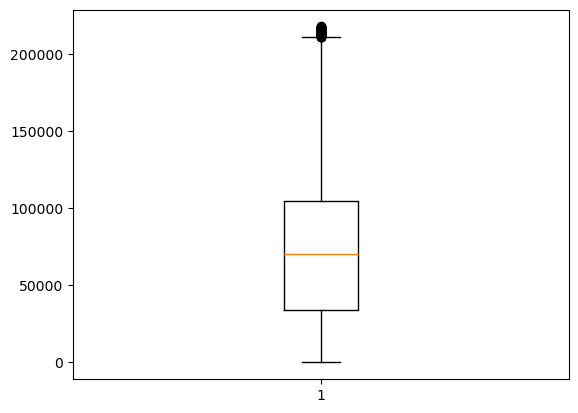

In [51]:
plt.boxplot(visa_df['prevailing_wage_new'])
plt.show()


In [52]:
path=r'C:\Users\reddy\Naresh IT\Data Science\python classes\visadataset.csv'
visa_df=pd.read_csv(path)
visa_df.head(3)

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied


**np.where**

- above replace one we use traditional approach
- for loop , list , if-else
- the same we can get by using np.where method

In [95]:
dict1={'Name':['A','B','C','D'],'Num':[1,2,3,4]}
d=pd.DataFrame(dict1)
d['Num']>2

0    False
1    False
2     True
3     True
Name: Num, dtype: bool

In [96]:
# i want to replace the values we is greater than >2
# other wise keep same number

l=[]
for i in d['Num']:
    if i>2:
        l.append(200)
    else:
        l.append(i)
d['Num']=l
d
# how many condtions i>2 it is true ==one value
#if it is false== another value


,Name,Num
0,A,1
1,B,2
2,C,200
3,D,200


#np.where(con,True,False)
- will take 3 arguments


   - condition=d['Num']>2

     -True value=100

      -False value=d['Num']

In [6]:
import numpy as np
import pandas as pd
dict1={'Name':['A','B','C','D'],'Num':[1,2,3,4]}
d=pd.DataFrame(dict1)
d['Num']>2

l=[]
for i in d['Num']:
    if i>2:
        l.append(200)
    else:
        l.append(i)
d['Num']=l
d

np.where(d['Num']>2,200,d['Num'])

array([  1,   2, 200, 200], dtype=int64)

In [112]:
l=np.where(d['Num']>2,200,d['Num'])

d['Num']=l
d

,Name,Num
0,A,1
1,B,2
2,C,200
3,D,200


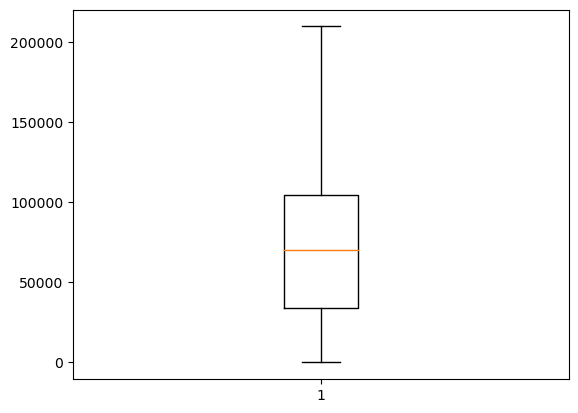

In [118]:
Q1=np.percentile(visa_df['prevailing_wage'],25)
Q2=np.percentile(visa_df['prevailing_wage'],50)
Q3=np.percentile(visa_df['prevailing_wage'],75)
IQR=Q3-Q1
lb=Q1-1.5*IQR
ub=Q3+1.5*IQR


median=visa_df['prevailing_wage'].median()
c1=visa_df['prevailing_wage']<lb
c2=visa_df['prevailing_wage']>ub
con=c1|c2

m=median
v=visa_df['prevailing_wage']

visa_df['prevailing_wage']=np.where(con,m,v)
plt.boxplot(visa_df['prevailing_wage'])
plt.show()
